In [38]:
import pandas as pd

from collections import namedtuple
from datetime import datetime
from obspy import UTCDateTime

import catalog_lookup
from importlib import reload
%matplotlib inline

In [ ]:
CATALOG_PATH = 'Benz_catalog.csv'

In [2]:
predicted_times = catalog_lookup.predicted_df('predictions/predictions.csv')

In [3]:
to_string = lambda date: date.strftime('%m/%d/%Y')
start, end = predicted_times['event_start'].iloc[0], predicted_times['event_end'].iloc[-1]
start, end = to_string(start), to_string(end)

In [4]:
catalog_times = catalog_lookup.catalog_df(CATALOG_PATH, start, end)

In [9]:
# Events predicted        
predicted_events = predicted_times[predicted_times['Guess'] == 1]
predicted_events = catalog_lookup.find_events_in_catalog(predicted_events, catalog_times)

/data/notebooks/analyze-benz/catalog_lookup.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['timerange'] = df.apply(lambda row: Timerange(row.event_start, row.event_end), axis=1)
/data/notebooks/analyze-benz/catalog_lookup.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['catalog_id'] = df.apply(lambda row: event_in_catalog(row.timerange, catalog_times), axis=1)


,Time,Guess,event_start,event_end,timerange,catalog_id
126690,2014-07-01T00:07:45.005000Z--2014-07-01T00:08:...,1,2014-07-01T00:07:45.005000Z,2014-07-01T00:08:05.005000Z,"(2014-07-01T00:07:45.005000Z, 2014-07-01T00:08...",-1
80994,2014-07-01T00:39:05.005000Z--2014-07-01T00:39:...,1,2014-07-01T00:39:05.005000Z,2014-07-01T00:39:25.005000Z,"(2014-07-01T00:39:05.005000Z, 2014-07-01T00:39...",-1
92049,2014-07-01T00:56:05.005000Z--2014-07-01T00:56:...,1,2014-07-01T00:56:05.005000Z,2014-07-01T00:56:25.005000Z,"(2014-07-01T00:56:05.005000Z, 2014-07-01T00:56...",-1
211128,2014-07-01T01:02:45.005000Z--2014-07-01T01:03:...,1,2014-07-01T01:02:45.005000Z,2014-07-01T01:03:05.005000Z,"(2014-07-01T01:02:45.005000Z, 2014-07-01T01:03...",-1
26202,2014-07-01T01:03:05.005000Z--2014-07-01T01:03:...,1,2014-07-01T01:03:05.005000Z,2014-07-01T01:03:25.005000Z,"(2014-07-01T01:03:05.005000Z, 2014-07-01T01:03...",-1


In [30]:
catalog_events = catalog_times.copy()
catalog_events['found'] = catalog_events.index.map(lambda i: i in set(predicted_events['catalog_id'].values))

In [31]:
catalog_events.head()

,Date,Time,Magnitude,Variance,origintime,utc_timestamp,found
33251,07/01/2014,00:14:29,-0.42,0.41,2014-07-01T00:14:29.000000Z,1.404174e+09,False
33252,07/01/2014,01:05:21,0.55,0.44,2014-07-01T01:05:21.000000Z,1.404177e+09,False
33253,07/01/2014,01:07:07,1.21,0.39,2014-07-01T01:07:07.000000Z,1.404177e+09,True
33254,07/01/2014,01:07:13,0.39,0.44,2014-07-01T01:07:13.000000Z,1.404177e+09,False
33255,07/01/2014,01:07:18,0.33,0.40,2014-07-01T01:07:18.000000Z,1.404177e+09,False


In [32]:
predicted_events.head()

,Time,Guess,event_start,event_end,timerange,catalog_id
126690,2014-07-01T00:07:45.005000Z--2014-07-01T00:08:...,1,2014-07-01T00:07:45.005000Z,2014-07-01T00:08:05.005000Z,"(2014-07-01T00:07:45.005000Z, 2014-07-01T00:08...",-1
80994,2014-07-01T00:39:05.005000Z--2014-07-01T00:39:...,1,2014-07-01T00:39:05.005000Z,2014-07-01T00:39:25.005000Z,"(2014-07-01T00:39:05.005000Z, 2014-07-01T00:39...",-1
92049,2014-07-01T00:56:05.005000Z--2014-07-01T00:56:...,1,2014-07-01T00:56:05.005000Z,2014-07-01T00:56:25.005000Z,"(2014-07-01T00:56:05.005000Z, 2014-07-01T00:56...",-1
211128,2014-07-01T01:02:45.005000Z--2014-07-01T01:03:...,1,2014-07-01T01:02:45.005000Z,2014-07-01T01:03:05.005000Z,"(2014-07-01T01:02:45.005000Z, 2014-07-01T01:03...",-1
26202,2014-07-01T01:03:05.005000Z--2014-07-01T01:03:...,1,2014-07-01T01:03:05.005000Z,2014-07-01T01:03:25.005000Z,"(2014-07-01T01:03:05.005000Z, 2014-07-01T01:03...",-1


In [80]:
new.head()

,Time,Guess,event_start,event_end,timerange,catalog_id
126690,2014-07-01T00:07:45.005000Z--2014-07-01T00:08:...,1,2014-07-01T00:07:45.005000Z,2014-07-01T00:08:05.005000Z,"(2014-07-01T00:07:45.005000Z, 2014-07-01T00:08...",-1
80994,2014-07-01T00:39:05.005000Z--2014-07-01T00:39:...,1,2014-07-01T00:39:05.005000Z,2014-07-01T00:39:25.005000Z,"(2014-07-01T00:39:05.005000Z, 2014-07-01T00:39...",-1
92049,2014-07-01T00:56:05.005000Z--2014-07-01T00:56:...,1,2014-07-01T00:56:05.005000Z,2014-07-01T00:56:25.005000Z,"(2014-07-01T00:56:05.005000Z, 2014-07-01T00:56...",-1
211128,2014-07-01T01:02:45.005000Z--2014-07-01T01:03:...,1,2014-07-01T01:02:45.005000Z,2014-07-01T01:03:05.005000Z,"(2014-07-01T01:02:45.005000Z, 2014-07-01T01:03...",-1
26202,2014-07-01T01:03:05.005000Z--2014-07-01T01:03:...,1,2014-07-01T01:03:05.005000Z,2014-07-01T01:03:25.005000Z,"(2014-07-01T01:03:05.005000Z, 2014-07-01T01:03...",-1


In [39]:
found = catalog_events[catalog_events['found'] == True]
missed = catalog_events[catalog_events['found'] == False]
new = predicted_events[predicted_events['catalog_id'] == -1]

# Visualizations

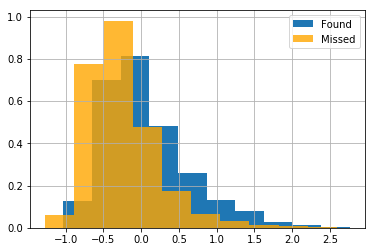

In [69]:
found.Magnitude.hist(density=True, label='Found')
missed.Magnitude.hist(density=True, fc=(1, .65, 0, 0.8), label='Missed')
plt.legend()

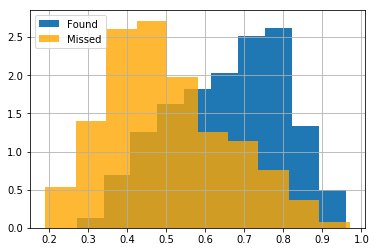

In [67]:
import matplotlib.pyplot as plt

found.Variance.hist(density=True, label='Found')
missed.Variance.hist(density=True, fc=(1, .65, 0, 0.8), label='Missed')
plt.legend()

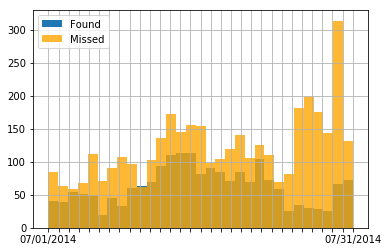

In [98]:
start = found.iloc[0].Date
end = found.iloc[-1].Date

found.Date.hist(label='Found', bins=31)
missed.Date.hist(fc=(1, .65, 0, 0.8), label='Missed', bins=31)
plt.legend()

ax = plt.gca() 
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = start
labels[-1] = end
ax.set_xticklabels(labels)

plt.show()

In [105]:
import subprocess

In [108]:
subprocess.Popen("ifconfig", shell=True, stdout=subprocess.PIPE).stdout.read()

b''